#### Assignment 2 : Fitting and Alignment
#### Name : Jayasinghe D.R.
#### Index No. : 190262L

### Question 1

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

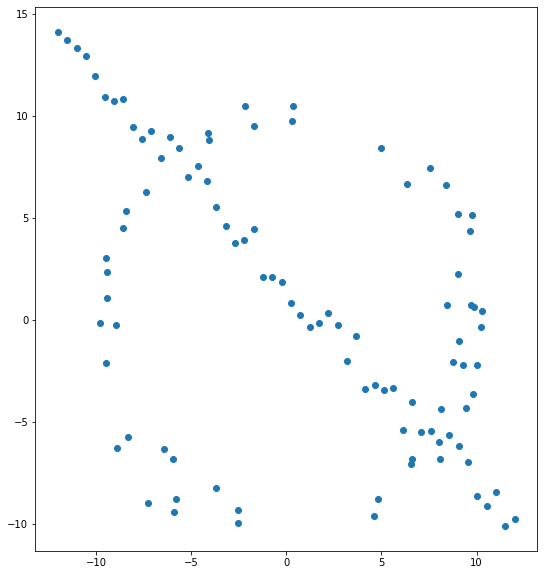

In [43]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt

#np.random.seed(0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape( half_n, 1), y.reshape(half_n, 1)))

m, b = -1, 2
x = np.linspace (-12, 12 , half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1 ), y.reshape(half_n, 1 )))

X = np.vstack((X_circ, X_line))

a = X[:,0] #1st column
b = X[:,1] #2nd column

#plotting the data set
plt.figure(figsize=(9, 10))
plt.plot(a, b, 'o')
plt.plot



In [4]:
def findCircle(pt1, pt2, pt3):
    x1, y1 = pt1[0], pt1[1]
    x2, y2 = pt2[0], pt2[1]
    x3, y3 = pt3[0], pt3[1]

    #detect if it is circle
    #if not (((y3 - y2)/(x3 - x2)) == ((y2 - y1)/(x2 - x1))):

    #circle equation 
    # x**2 + y**2 + 2gx + 2fy + c = 0
    a1 = x1 - x2
    a2 = x1 - x3

    b1 = y1 - y2
    b2 = y1 - y3

    c1 = (x2**2 - x1**2 + y2**2 - y1**2)/2
    c2 = (x3**2 - x1**2 + y3**2 - y1**2)/2

    A = np.array([[a1, b1], [a2, b2]], dtype=np.float32)
    C = np.array([[c1], [c2]], dtype=np.float32)

    g_f = np.linalg.pinv(A) @ C
    g = -g_f[0][0]
    f = -g_f[1][0]
    c = -(x1**2 + y1**2  + 2*g*x1 + 2*f*y1)
    
    r_sqaured = g**2 + f**2 - c

    if (r_sqaured > 0):
        #r = np.sqrt(r_sqaured)
        #print(g, f, r)
        r1 = np.sqrt((x1-g)**2 + (y1-f)**2)
        r2 = np.sqrt((x2-g)**2 + (y2-f)**2)
        r3 = np.sqrt((x3-g)**2 + (y3-f)**2)
        r = np.mean([r1, r2, r3])
        #print(r1, r2, r3)
        return (g, f, r)
    else:
        return None


In [45]:
def RANSAC(Set, a, b, r, t):
    in_t = r - t #inner threshold
    out_t = r + t #outer threshold
    inlier_arr=[]
    inlier_ct = 0
    error = 0

    for pt in Set:
        #iterate through each point in X
        x, y = pt[0], pt[1]     
        r_cal = np.sqrt((x-a)**2 + (y-b)**2)    #calc distance to point from centre of model circle

        if (in_t < r_cal < out_t) & (5 < r < 15):  
            #point lies within the threshold and radius is within a given range
            inlier_ct += 1
            error += np.abs(r_cal - r)
            inlier_arr.append(pt)

    return inlier_ct, inlier_arr, error

In [48]:
#implementing the RANSAC algorithm

N_1 = 35  #assuming an outlier ratio of 50% for 1st iteration
N_2 = 10 #assuming an outlier ratio of 10% for 2nd iterations
t = 1   #threshold
d_1 = 30  #concensus data size
d_2 = 40

ransac_candidates = []
ransac_inliers = []

max_count = 0 #finding the best fit circle
best_fit_cricle = [0, 0, 0]


for i in range(N_1):
    index = np.random.choice(X.shape[0], 3, replace=False) 
    ran_pts = X[index]
    a, b, r = findCircle(ran_pts[0], ran_pts[1], ran_pts[2])

    inlier_count, inlier_array, mean_error = RANSAC(X, a, b, r, t)

    #finding best fit circle
    if (inlier_count >= max_count) & (inlier_count > d_1):
        max_count = inlier_count
        best_fit_circle = [a, b, r]
        best_pts = ran_pts

    if inlier_count > d_1:
        for j in range(N_2):
            #testing the algorithm for selected inlier points
            inlier_array = np.array(inlier_array)
            index_1 = np.random.choice(inlier_array.shape[0], 3, replace=False)
            ran_pts_1 = inlier_array[index_1]
            a_1, b_1, r_1 = findCircle(ran_pts_1[0], ran_pts_1[1], ran_pts_1[2])

            inlier_count_1, inlier_array_1, mean_error_1 = RANSAC(X, a_1, b_1, r_1, t)

            if inlier_count_1 > d_2:
                ransac_candidates.append([a_1, b_1, r_1, inlier_count_1, mean_error_1/inlier_count_1])
                ransac_inliers.append(inlier_array_1)
    

#finding the bestfit circle
print(len(ransac_candidates))

for data in ransac_candidates:
    print(data)

29
[-0.255118, 0.8052044, 9.66694262374135, 44, 0.4618457024237949]
[0.11441113, 0.7820123, 9.72752696924884, 48, 0.40493747470953156]
[-0.017087191, 1.1190552, 10.045712998863856, 43, 0.4573747892737469]
[0.23718683, -0.124449074, 9.976326280574547, 51, 0.42366059495976927]
[0.40009862, 0.6561089, 9.860019828707712, 46, 0.34190041731167076]
[0.37826267, -0.11463255, 10.05206651182475, 47, 0.390597586956219]
[0.47274455, 0.08380641, 9.385614447451188, 46, 0.5004991282650231]
[0.34565714, -0.14842953, 10.309605865646928, 42, 0.35839744694141706]
[0.28558972, 0.79769576, 9.847503040226039, 48, 0.3873823958583449]
[-0.075134516, 0.69020516, 9.805506805928191, 48, 0.4401363272510159]
[-0.43490863, 0.97093487, 9.547501593660995, 41, 0.5107064885401598]
[0.02043495, 0.41585666, 9.823510925023266, 50, 0.41578007990493954]
[0.4964038, -0.011414643, 9.749534756017228, 50, 0.45347488364826316]
[-0.37778074, 0.57378596, 10.083670587983752, 48, 0.5367126750433663]
[0.61504984, 0.3558208, 9.9831236

In [49]:
#selecting the best candidate for RANSAC circle
s = len(ransac_candidates)
max_count = 0
min_error = 100000
rns_index = 0

for n in range(s):
    circ = ransac_candidates[n]
    if circ[3] > max_count:
        max_count = circ[3]
        min_error = circ[4]
        rns_index = n
    if (circ[3] == max_count) & (circ[4]<min_error):
        max_count = circ[3]
        min_error = circ[4]
        rns_index = n
        
#best RANSAC circle
#x_ransac, y_ransac, r_ransac = ransac_candidate
circ_RNS = ransac_candidates[rns_index]

print(circ_RNS)
print(len(ransac_inliers[rns_index]))

[0.23718683, -0.124449074, 9.976326280574547, 51, 0.42366059495976927]
51


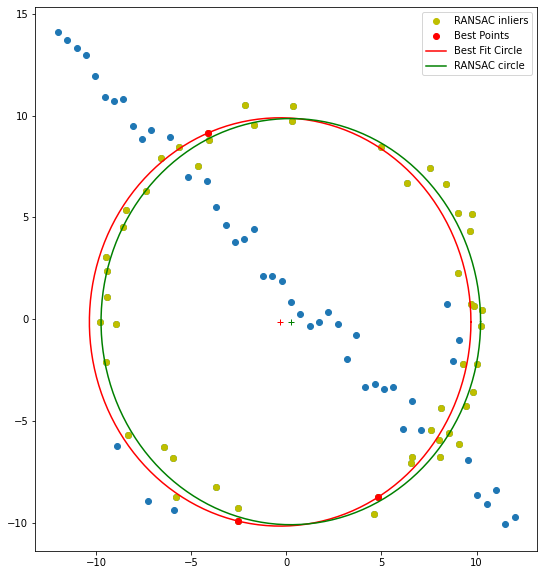

In [50]:
#plotting the best fit circle

#parameters of the best fit circle
x_0, y_0, r_0 = best_fit_circle[0], best_fit_circle[1], best_fit_circle[2]

#parameters of the RANSAC circle
x_RNS, y_RNS, r_RNS = circ_RNS[0], circ_RNS[1], circ_RNS[2]

plt.figure(figsize=(9, 10))

#plotting the data set
a = X[:,0] #1st column
b = X[:,1] #2nd column
plt.plot(a, b, 'o')

#plot RANSAC inliers
inliers = np.array(ransac_inliers[rns_index])
inlier_x = inliers[:,0]
inliers_y = inliers[:,1]
plt.plot(inlier_x, inliers_y, 'o', color='y', label= 'RANSAC inliers')

#best points
best_x = best_pts[:,0]
best_y = best_pts[:,1]
plt.plot(best_x, best_y, 'o', color='r', label= 'Best Points')

#plotting the best fit circle
theta = np.linspace( 0 , 2 * np.pi , 150 )
p = x_0 + r_0 * np.cos( theta )
q = y_0 + r_0 * np.sin( theta)
plt.plot(p, q, color='r', label='Best Fit Circle')

#plot the RANSAC circle
p = x_RNS + r_RNS * np.cos( theta )
q = y_RNS + r_RNS * np.sin( theta)
plt.plot(p, q, color='g', label='RANSAC circle')

#plot centre of best fit circle
plt.plot(x_0, y_0, '+', color='r')

#plot centre of RANSAC circle
plt.plot(x_RNS, y_RNS, '+', color='g')

plt.legend()

plt.show()

### Question 2

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Select points on the image using mouse click
# importing the module
import cv2
  
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)
 
    # checking for right mouse clicks    
    if event==cv2.EVENT_RBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)
 
# driver function
if __name__=="__main__":
 
    # reading the image
    img = cv2.imread(r'images/001.jpg', 1)
 
    # displaying the image
    cv2.imshow('image', img)
 
    # setting mouse handler for the image
    # and calling the click_event() function
    cv2.setMouseCallback('image', click_event)
 
    # wait for a key to be pressed to exit
    cv2.waitKey(0)
    
    # close the window
    cv2.destroyAllWindows()


143   203
520   290
524   525
130   529


In [4]:
s = np.array([[0, 0], [640, 0], [640, 320], [0, 320]])  #points on source image (uk_flag)
d = np.array([[143, 203], [520, 290], [524, 527], [130, 529]])  #points on destination image (Building)

x_s, y_s = s[:, 0], s[:, 1]
x_d, y_d = d[:, 0], d[:, 1]

#creating matrix A
A = np.array([
    [ x_s[0], y_s[0], 1, 0, 0, 0, -x_d[0]*x_s[0], -x_d[0]*y_s[0], -x_d[0] ],
    [ 0, 0, 0, x_s[0], y_s[0], 1, -y_d[0]*x_s[0], -y_d[0]*y_s[0], -y_d[0] ],

    [ x_s[1], y_s[1], 1, 0, 0, 0, -x_d[1]*x_s[1], -x_d[1]*y_s[1], -x_d[1] ],
    [ 0, 0, 0, x_s[1], y_s[1], 1, -y_d[1]*x_s[1], -y_d[1]*y_s[1], -y_d[1] ],

    [ x_s[2], y_s[2], 1, 0, 0, 0, -x_d[2]*x_s[2], -x_d[2]*y_s[2], -x_d[2] ],
    [ 0, 0, 0, x_s[2], y_s[2], 1, -y_d[2]*x_s[2], -y_d[2]*y_s[2], -y_d[2] ],

    [ x_s[3], y_s[3], 1, 0, 0, 0, -x_d[3]*x_s[3], -x_d[3]*y_s[3], -x_d[3] ],
    [ 0, 0, 0, x_s[3], y_s[3], 1, -y_d[3]*x_s[3], -y_d[3]*y_s[3], -y_d[3] ],
], dtype=np.float32)

#eigen vector corresponding to the smallest eigen value for A
W, V = np.linalg.eig(A.T @ A)
eigen_vec = V[:, np.argmin(W)]
eigen_vec = eigen_vec/eigen_vec[8]

#homography
H = eigen_vec.reshape(3, 3)
print(H)

[[ 8.9385754e-01 -5.9700683e-02  1.4300000e+02]
 [ 3.0591956e-01  9.4112694e-01  2.0299991e+02]
 [ 5.8614428e-04 -1.4673633e-04  1.0000000e+00]]


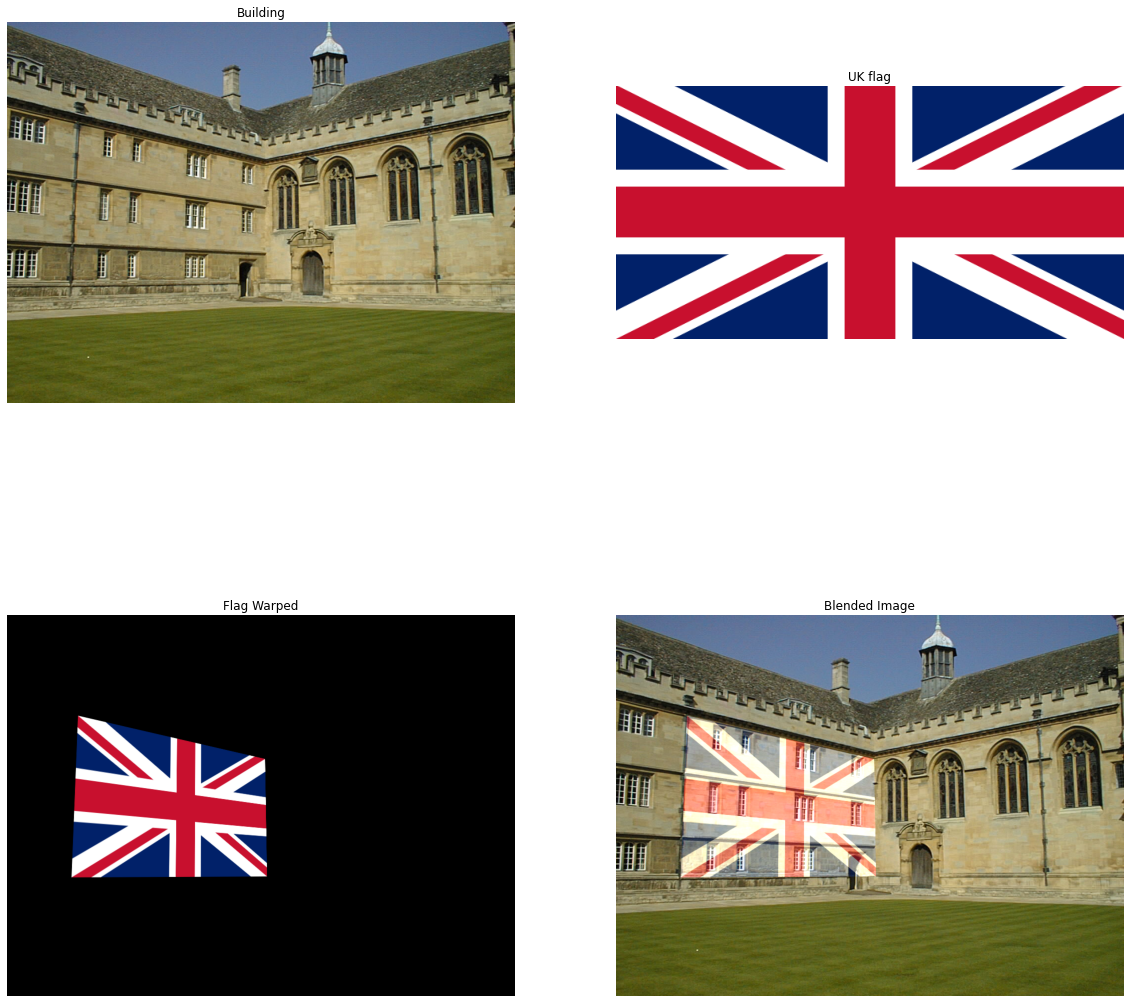

In [20]:
im1 = cv.imread(r'images/001.jpg', cv.IMREAD_ANYCOLOR)
im4 = cv.imread('uk_640x320.png', cv.IMREAD_ANYCOLOR)

assert im1 is not None
assert im4 is not None

im4to1 = cv.warpPerspective(im4, H, (1024, 768))

im_blended = cv.addWeighted(im1, 1, im4to1, 0.5, 0)

fig, ax = plt.subplots(2, 2, figsize=(20, 20))

ax[0,0].imshow(cv.cvtColor(im1, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Building')
ax[0,0].axis('off')

ax[0,1].imshow(cv.cvtColor(im4, cv.COLOR_BGR2RGB))
ax[0,1].set_title('UK flag')
ax[0,1].axis('off')

ax[1,0].imshow(cv.cvtColor(im4to1, cv.COLOR_BGR2RGB))
ax[1,0].set_title('Flag Warped')
ax[1,0].axis('off')

ax[1,1].imshow(cv.cvtColor(im_blended, cv.COLOR_BGR2RGB))
ax[1,1].set_title('Blended Image')
ax[1,1].axis('off')

plt.show()


In [ ]:
cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1', im1)
cv.waitKey(0)

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1', im4)
cv.waitKey(0)

cv.namedWindow('Image 1', cv.WINDOW_AUTOSIZE)
cv.imshow('Image 1', im4to1)
cv.waitKey(0)



#img_arr = np.hstack((im1, im4))
#cv2.imshow('Input Images',img_arr)
cv2.imshow('Blended Image',dst)

cv2.waitKey(0)

cv.destroyAllWindows()